# **Proyecto 1: Análisis estadístico**

### Andres Banquez Cabarcas

### Melina Villada López

### **Objetivos proyecto**

* Fortalecer las competencias en programación para el análisis de datos
* Discutir resultados a partir de gráficos y estadística descriptiva
* Evaluar el impacto de la extracción de características de señales para encontrar patrones diferenciales en datos de poblaciones clínicas
* Proponer nuevas estrategias de análisis de información fisiológica para el diseño de ayudas diagnósticas

### **Requerimientos**


**Contexto**

*• Consultar para enfermedad de Parkinson, Huntington y Esclerosis Lateral Amiotrófica cómo se diagnostican y el reto que existe para el diagnóstico temprano de dichas enfermedades (5%).*


**Enfermedad de Parkinson**

*Diagnóstico:*

1. Evaluación Clínica: El diagnóstico de Parkinson se basa principalmente en la evaluación clínica de los síntomas motores, como temblores en reposo, rigidez muscular, bradicinesia (lentitud de movimientos) y inestabilidad postural.
2. Historial Médico: Se revisa el historial médico del paciente para descartar otras condiciones que puedan causar síntomas similares.
3. Pruebas de Imagen: Las pruebas como la tomografía por emisión de positrones (PET) o la tomografía computarizada por emisión de fotón único (SPECT) pueden ayudar, pero no son definitivas para el diagnóstico.
4. Respuesta a la Medicación: La respuesta positiva a la levodopa (un medicamento usado en el tratamiento del Parkinson) puede apoyar el diagnóstico.

*Reto del Diagnóstico Temprano:*

* Síntomas Iniciales: Los síntomas iniciales pueden ser sutiles y se confunden fácilmente con el envejecimiento normal o con otros trastornos.
* No hay Marcadores Biológicos: No existe un marcador biológico definitivo que confirme el diagnóstico en las etapas tempranas[1].

**Enfermedad de Huntington**

*Diagnóstico:*

1. Evaluación Clínica: Se observa la presencia de movimientos involuntarios (corea), problemas cognitivos y cambios en el comportamiento.
2. Historial Familiar: Dado que la enfermedad de Huntington es genética, el historial familiar de la enfermedad es un factor clave.
3. Pruebas Genéticas: Un análisis de sangre puede identificar la mutación en el gen HTT que causa la enfermedad.

*Reto del Diagnóstico Temprano:*

* Síntomas Psicológicos y Cognitivos: Los síntomas cognitivos y psiquiátricos pueden preceder a los síntomas motores, lo que dificulta un diagnóstico temprano basado en la observación clínica.
*Estigma y Temor: El diagnóstico genético puede llevar a dilemas éticos y emocionales para los individuos y sus familias[2].

**Esclerosis Lateral Amiotrófica (ELA)**

*Diagnóstico:*

1. Evaluación Clínica: El diagnóstico se basa en la observación de la debilidad muscular progresiva, fasciculaciones (contracciones musculares involuntarias), y atrofia muscular.
2. Electromiografía (EMG): La EMG mide la actividad eléctrica de los músculos y puede mostrar signos de denervación y reinervación.
3. Imágenes por Resonancia Magnética (MRI): Utilizadas para descartar otras condiciones.
4. Pruebas de Conducción Nerviosa: Evaluan la función de los nervios y pueden ayudar a excluir neuropatías periféricas.

*Reto del Diagnóstico Temprano:*

* Variabilidad de Síntomas: Los síntomas pueden variar ampliamente entre los pacientes y progresar a diferentes velocidades, lo que complica el diagnóstico.
* Falta de Biomarcadores Específicos: No hay pruebas de laboratorio específicas para confirmar el diagnóstico de ELA en sus primeras etapas.

*• Discutir matemáticamente, explicando con fórmulas, cómo funciona la rutina detrend de scipy (5%)*



La rutina detrend de SciPy se utiliza para eliminar la tendencia lineal de una señal. Esta operación es común en el procesamiento de señales y en el análisis de series temporales para enfocarse en las fluctuaciones alrededor de una tendencia media.

Suponemos que la serie temporal es una combinación aditiva de una tendencia y otros componentes.

Y(t)=a(t)+b(t)+e(t)

* Y(t) es la serie temporal original

* a(t) es la tendencia

* b(t) es el componente estacional

* e(t) es el ruido

Por lo tanto, para eliminar la tendencia de una serie temporal, se debe estimar el componente de tendencia y luego restarlo de los datos originales, lo que nos deja solo con el componente estacional y el ruido.

Para encontrar T(t) y  S(t), utilizamos la regresión lineal, que minimiza el error cuadrático medio entre los valores de la señal  y(t) y los valores predichos por la tendencia lineal  at+b.

La fórmula general para la regresión lineal simple (en una dimensión) es:

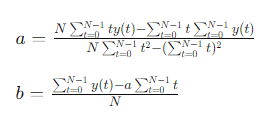

Una vez que hemos encontrado a y b, podemos calcular la señal sin tendencia (detrended signal) restando la tendencia lineal de la señal original:

𝑟(𝑡)=𝑦(𝑡)−(𝑎𝑡+𝑏)
[4]


*• Discutir matemáticamente, explicando con fórmulas, cómo funciona el filtro hampel (5%)*

El filtro Hampel es una técnica robusta de procesamiento de señales que se utiliza para identificar y reemplazar valores atípicos en una serie temporal. A diferencia de otros métodos de filtrado, el filtro Hampel es particularmente efectivo para manejar datos con ruido y valores atípicos, ya que se basa en la mediana y la desviación absoluta de la mediana (MAD).

Conceptos Clave

* Ventana de Análisis (Window): El filtro opera en una ventana deslizante de tamaño 2k+1, donde  k es el número de puntos a la izquierda y a la derecha del punto central en la ventana.

* Mediana (Median): La mediana es una medida robusta de tendencia central que no se ve afectada por valores atípicos.

* Desviación Absoluta de la Mediana (MAD): La MAD es una medida robusta de dispersión que se define como la mediana de los valores absolutos de las desviaciones respecto a la mediana.

Dado un conjunto de datos 

1. Calcular la Mediana Local: Para cada punto 𝑥𝑖 en la serie temporal, considere una ventana de tamaño 2𝑘+1 centrada en 𝑥𝑖. La mediana local Med (𝑥𝑖) se calcula como:



2.Calcular la MAD Local: La MAD local  MAD(𝑥𝑖)  se calcula como:

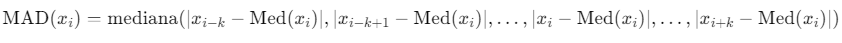

3. Identificación de Valores Atípicos: Un punto 𝑥𝑖 se considera un valor atípico si la diferencia entre 𝑥𝑖 y la mediana local Med (𝑥𝑖) es mayor que un umbral determinado. El umbral se define típicamente como:

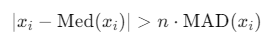

donde n es un factor de escala (por ejemplo, n=3).

4. Reemplazo de Valores Atípicos: Si 𝑥𝑖 es un valor atípico, se reemplaza con la mediana local Med(𝑥𝑖): 
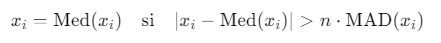 [5]

*• Discutir matemáticamente y desde la bioingeniería qué mide la entropia de permutación ( https://www.aptech.com/blog/permutation-entropy/ , https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8051436/ ) (5%)*


La entropía de permutación (PE) es una herramienta robusta de series temporales que proporciona una medida de cuantificación de la complejidad de un sistema dinámico al capturar las relaciones de orden entre los valores de una serie temporal y extraer una distribución de probabilidad de los patrones ordinales.

* No es paramétrico y está libre de supuestos restrictivos de modelos paramétricos.
* Es robusto con respecto al ruido, computacionalmente eficiente, flexible e invariante con respecto a las transformaciones monótonas no lineales de los datos.
* Se basa en las nociones de entropía y dinámica simbólica.
* Da cuenta de la estructura de ordenamiento temporal (causalidad temporal) de una serie temporal dada de valores reales.
* Permite al usuario desbloquear el contenido dinámico complejo de las series temporales no lineales.

A diferencia de las rutinas mencionadas anteriormente, esta no modifica en si la señal, en cambio, entrega un valor que habla sobre que tan determinista y regular, o en su defecto, aleatorio y ruidosa puede ser una señal a analizar. Dicho de otra manera

El primer paso es dividir la serie temporal unidimensional en una matriz de vectores de columnas superpuestos. Esta división utiliza dos hiperparámetros:

T (tao): El retraso de tiempo de incrustación que controla el número de períodos de tiempo entre elementos de cada uno de los nuevos vectores de columna. Se recomienda un valor de 1

D : La dimensión de incrustación que controla la longitud de cada uno de los nuevos vectores de columna. Se recomienda un valor entre 3<=D<=7.

## **Programación**

### 1. Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés, de cada señal elimine los primeros 20 segundos, y las almacene en un ndarray.

In [1]:
# Importando las librerias
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import os
from scipy import stats
from scipy.io import loadmat
from scipy.signal import detrend
from scipy.special import factorial
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo .ts
archivo_ts = r'Control\control12.ts'
datos = pd.read_csv(archivo_ts, sep='\t', header=None)

# Extraer las primeras 5 columnas
columnas_extraidas = datos.iloc[:, 1:5]
tiempos = datos.iloc[:, 0]
detrended_columns = detrend(columnas_extraidas, axis=0)

# Convertir a ndarray
ndarray_resultante = detrended_columns

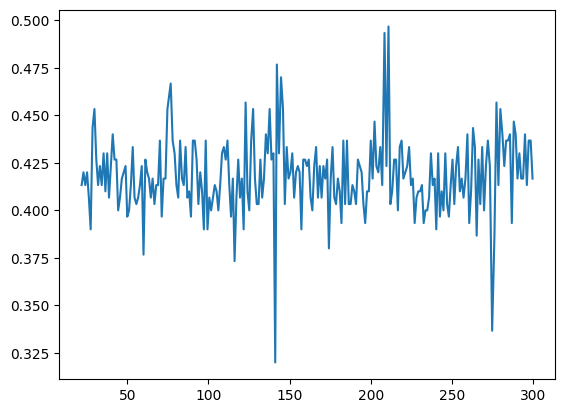

In [3]:
plt.plot(tiempos, datos.iloc[:, 3])

### 2. Para cada señal eliminar los errores en tendencia usando la rutina detrend.

In [4]:
columnas_detrend = columnas_extraidas.apply(detrend, axis=0)
print(columnas_detrend)

            1         2         3         4
0   -0.023096 -0.027982 -0.003636 -0.040011
1    0.003465  0.028417  0.003054  0.016577
2   -0.009975  0.008216 -0.003656 -0.003435
3   -0.030114 -0.028585  0.003033 -0.026747
4   -0.016954  0.021214 -0.010277  0.013241
..        ...       ...       ...       ...
239  0.010290 -0.005982  0.020580 -0.002854
240 -0.019850  0.020417 -0.006131  0.007134
241 -0.003289 -0.029784  0.017259  0.013722
242  0.036571  0.010015  0.017248  0.017111
243  0.003032  0.019814 -0.002762  0.000399

[244 rows x 4 columns]


### 3. Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel

In [5]:
def hampelfilter(wk: np.ndarray, K, FilterParms: list[int]) -> np.ndarray:
    """
    Procedure to implement the Hampel filter
    """
    #
    Thresh = FilterParms[0]
    ctr = wk#[K]
    ref = np.median(wk)

    AbsDev = abs(wk - ref)
    MAD = 1.4826 * np.median(AbsDev)
    TestVal = abs(ctr - ref)
    #if TestVal > Thresh * MAD:
    yk = ctr

    numero = np.sum((TestVal > Thresh * MAD)==True)

    yk[TestVal > Thresh * MAD] = ref


    return yk

In [6]:
def hampelFilter(archivos_ts: list[pd.DataFrame]) -> list[pd.DataFrame]:
    '''
        De los archivos anteriormente extraidos se extraerán las señales y se les
        realizara una rutina hampel para quitar los datos atipicos, posteriormente 
        se retornara una lista con las columnas ya filtradas.
    '''
    archivos_procesados = []
    for columnas_extraidas in archivos_ts:
        columnas_procesadas = []
        for i in range(columnas_extraidas.shape[1]):
            if i == 0:
                columnas_procesadas.append(columnas_extraidas[i])
                continue # Nuevamente ignoraremos el tiempo.
            columna_filtrada = hampelfilter(columnas_extraidas[i], 3, [6])
            columnas_procesadas.append(columna_filtrada)
        columnas_procesadas = pd.DataFrame(list(zip(*columnas_procesadas)), columns = ['Elapsed Time (sec)',
                                                                                       'Left Stride Interval (sec)',
                                                                                       'Right Stride Interval (sec)',
                                                                                       'Left Swing Interval (sec)',
                                                                                       'Right Swing Interval (sec)'])
        archivos_procesados.append(columnas_procesadas)
    return archivos_procesados

In [7]:
# Funcion para extraer la información
def dataExtractor(folder_path: str) -> tuple[list[pd.DataFrame], pd.DataFrame]:
    '''
    Extrae las primeras 5 señales como señales de interes para cada archivo .ts de una carpeta dada
    Además de extraerlas, sin sus 20 segundos iniciales, realiza un detrend en todas las columnas
    de interés excepto la columna 0 ya que esta es únicamente el tiempo transcurrido. Tambien realiza el filtro
    hampfel.
    
    Retorna dos datos, ambas listas de dataframe, uno con los datos con detrend y el otro sin detrend.
    '''
    dataE = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.ts'):
            file_path = os.path.join(folder_path, filename)
            data = pd.read_csv(file_path, sep='\s+', header=None)
            senalesinteres = data.iloc[:, [1, 2, 3, 4]]
            detrended_columns = detrend(senalesinteres, axis=0, type='linear')
            detrended_columns = pd.concat([data.iloc[:, 0],pd.DataFrame(detrended_columns, columns=[1, 2, 3, 4])], axis=1)
            senalesinteres[0] = data.iloc[:,0]*0
            senalesinteres = detrended_columns + senalesinteres.mean()
            dataE.append(senalesinteres)
            
    dataE = hampelFilter(dataE)
    return dataE

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\andre\AppData\Local\Temp\ipykernel_10620\3302677789.py:15: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(file_path, sep='\s+', header=None)


Algo importante a observar es que además de hacer un detrend y un filtro hampfel tambien se sumo el promedio de los datos obtenidos antes de realizar el detrend, esto es debido a que el detrend no solo elimina la tendencia lineal sino cualquier offset que pudiera tener, esto si bien no pareciera ser muy problemático modifica los resultados ya que al obtener el coeficiente de variación que se obtiene por la división entre la variación estandar (Que no varia mucho) y el promedio (Que terminaria tomando valores cercanos a cero), se termina obteniendo valores muy grandes, al hacerlo de esta manera mantuvimos el promedio sin alterar la eliminación de la tendencia lineal.

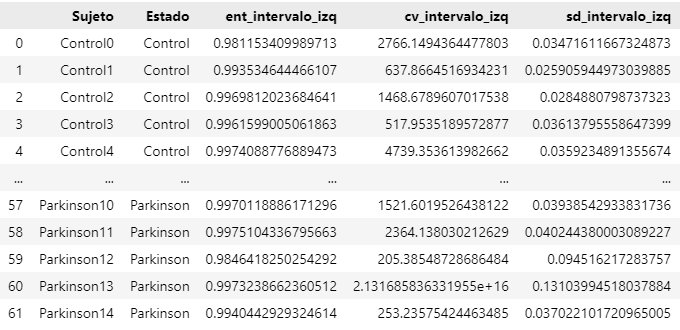

Este es un ejemplo de los valores obtenidos antes, como se ve, toma valores muy grandes (en porcentaje) de coeficiente de variación, lo cual da una dificultad muy grande a la hora de hacer las comparaciones con otros tal como se ve en la siguiente imagen que dificilmente se puede distingir las diferentes distribuciones y se ve que la escala esta en cantidades muy grandes de $10^{17}$.

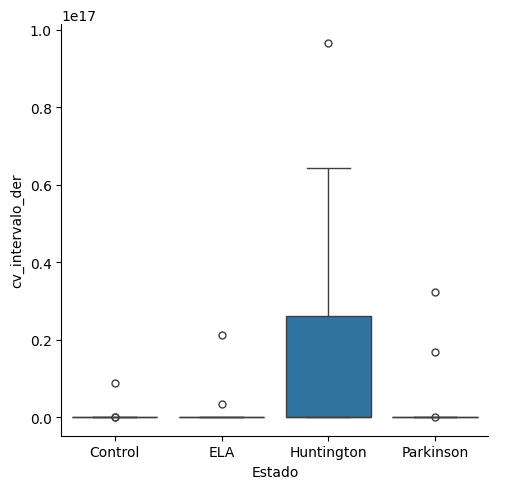

Además, posteriormente se podrá observar que los resultados de *entropia de permutación* y de *variación estandar* no varían en comparación a cuando se elimina el offset constante. También se hizo la prueba y las variaciones del promedio respecto a antes de realizar el **detrend** y despues de hacerlo estan en el orden de $10^{-16}$ o directamente es 0.

#### **Extracción de datos con detrend y filtro hampfel**

In [8]:
control_data = dataExtractor('Control')

In [9]:
ela_data = dataExtractor('ELA')

In [10]:
hun_data = dataExtractor('Huntington')

In [11]:
parkinson_data = dataExtractor('Parkinson')

### 4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia .

In [12]:
def statisticExtraction(senal: np.ndarray) -> tuple[float, float]:
    ''' 
    Recibe una señal en forma de np.array y retorna los 
    estadisticos de desviacion estandar y coeficiente de 
    variacion en forma de tupla.
    Retorna dos valores.
    '''
    media = np.abs(np.mean(senal))
    SD = np.std(senal)
    CV = (SD/media)*100
    return (CV, SD)

### 5. Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación (10%)

In [13]:
def permutation_entropy(time_series: np.ndarray, 
                        dimensiones: int = 4) -> float:
    '''
        Recibe un array que representa una señal, separa las permutaciones
        con dimensiones D, obtiene las probabilidades de las permutaciones 
        y finalmente calcula la entropia del sistema.
    '''
    
    n = len(time_series)
    permutations = np.array([np.argsort(time_series[i:i + dimensiones]) 
                             for i in range(n - dimensiones + 1)])

    # Contar las ocurrencias de cada permutación única
    _, counts = np.unique(permutations, axis=0, return_counts=True)
    
    # Probabilidad de cada patrón
    probabilities = counts / counts.sum()

    # Calcular la entropía de Shannon
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    # Normalizar la entropía
    max_entropy = np.log2(factorial(dimensiones))
    normalized_entropy = entropy / max_entropy
    
    return normalized_entropy

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [14]:
def finalFunction(archivosControl: list, archivosEla: list, 
                  archivosHun: list, archivosParkinson: list) -> pd.DataFrame:
    '''
    Toma las 4 listas **ya filtradas** y calcula las *variables estadisticas*
    junto con la *entropia* de cada uno de las señales tomadas por cada
    paciente.
    
    Retorna todo en un **dataframe** 
    '''
    dfFinal = []
    lista = [archivosControl,archivosEla, archivosHun, archivosParkinson]
    nombres = ['Control', 'ELA', 'Huntington', 'Parkinson']
    columnas = ['Sujeto', 'Estado', 'ent_intervalo_izq', 'cv_intervalo_izq', 'sd_intervalo_izq',
                'ent_intervalo_der', 'cv_intervalo_der', 'sd_intervalo_der',
                'ent_balanceo_izq', 'cv_balanceo_izq', 'sd_balanceo_izq',
                'ent_balanceo_der', 'cv_ibalanceo_der', 'sd_ibalanceo_der']
    dfFinal = pd.DataFrame(columns=columnas)
    for n, k in enumerate(lista):
        for j in range(len(k)):
            info = [f'{nombres[n]}{j}',nombres[n]]
            for i in k[j]:
                if i == 'Elapsed Time (sec)':
                    continue
                data = k[j][i]
                CV, SD = statisticExtraction(data)
                entropy = permutation_entropy(data, dimensiones=3)
                info += [entropy, CV, SD]
            info = pd.DataFrame(data=np.array([info]), columns = columnas)
            dfFinal = pd.concat([dfFinal, info], ignore_index = True, axis=0)
    return dfFinal

In [15]:
dfFinal = finalFunction(control_data,ela_data,hun_data,parkinson_data)
dfFinal

,Sujeto,Estado,ent_intervalo_izq,cv_intervalo_izq,sd_intervalo_izq,ent_intervalo_der,cv_intervalo_der,sd_intervalo_der,ent_balanceo_izq,cv_balanceo_izq,sd_balanceo_izq,ent_balanceo_der,cv_ibalanceo_der,sd_ibalanceo_der
0,Control0,Control,0.981153409989713,3.2412087048270974,0.03471611667324873,0.9967736727795632,2.8873766166437687,0.030913113218174575,0.9980777796320686,6.457326758224164,0.02241460283420978,0.9895724788063197,4.697332657264278,0.017903635042754672
1,Control1,Control,0.993534644466107,2.5947028583131715,0.025905944973039885,0.9961547590166601,2.49318125557326,0.024879572595207268,0.9941158670633308,3.204314843878003,0.011983138641223304,0.9817241877709745,3.310616838100376,0.012008571468699592
2,Control2,Control,0.9969812023684641,2.7567973782739323,0.0284880798737323,0.9907514188962872,2.8385505571633556,0.029334255805867144,0.9894342438259868,3.4787284961336526,0.011936969204186448,0.9907149964654808,3.887574849828272,0.014216860759815686
3,Control3,Control,0.9961599005061863,3.1801645355472243,0.03613795558647399,0.9965943059922231,3.0309051760815033,0.03444753538257064,0.9959499005092185,4.467415953168255,0.01870035111111261,0.9908738794601357,3.5569398084504718,0.014924099621468689
4,Control4,Control,0.9974088776889473,3.2438875845963873,0.0359234891355674,0.9965352886719774,3.4778309523057334,0.03850804113139852,0.9901161087576699,4.110850224797573,0.016888273507382236,0.9993707348277491,5.838297372170956,0.02369610386870261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Parkinson10,Parkinson,0.9970118886171296,3.7324513617904254,0.03938542933831736,0.998154986005016,3.753736088755376,0.03960747025265458,0.9866385960001312,6.771877934396414,0.023606466661287472,0.9965418356551264,7.587953523477051,0.025671345993301238
58,Parkinson11,Parkinson,0.9975104336795663,3.8938004847002667,0.040244380003089227,0.9975480892404786,4.041251726955723,0.04174962437278666,0.9989979251636837,9.130661103018504,0.03365024655174288,0.996827888028817,7.439655528820441,0.02738855252346839
59,Parkinson12,Parkinson,0.9846418250254292,7.964465080480662,0.094516217283757,0.98109159044975,6.9758794658759875,0.08300208533896455,0.9868214990108566,6.38674920874174,0.025157681164319674,0.9940113128259335,9.037944521433069,0.03535996900327039
60,Parkinson13,Parkinson,0.9973238662360512,9.568878438084887,0.13103994518037884,0.9975599154610756,9.999541529861176,0.13618070204801264,0.9948054406616805,19.754803534650538,0.07827291074792611,0.9888667687393229,15.192810571387543,0.06296933512536128


In [16]:
Controles = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Control')]
ELA = dfFinal[dfFinal.Sujeto.map(str).str.startswith('ELA')]
Hung = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Huntington')]
Park = dfFinal[dfFinal.Sujeto.map(str).str.startswith('Parkinson')]

# **Informe** 
a. Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva (25%)

Lo que se hace a continuación es eliminar los datos atipicos de los estadisticos obtenidos y posteriormente se grafican en boxplot en conjunto.

<Figure size 640x480 with 0 Axes>

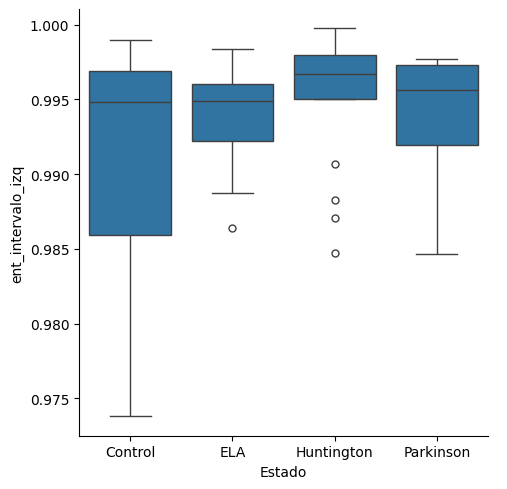

<Figure size 640x480 with 0 Axes>

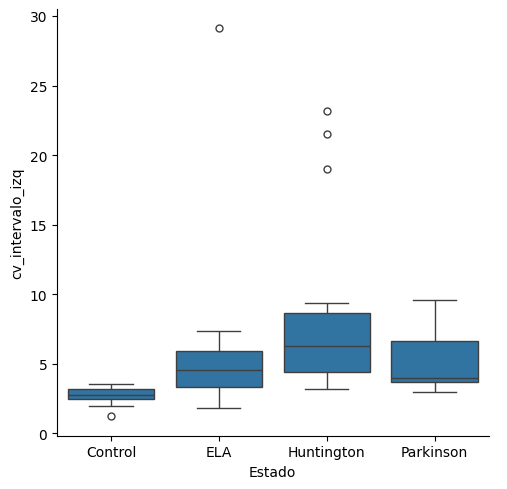

<Figure size 640x480 with 0 Axes>

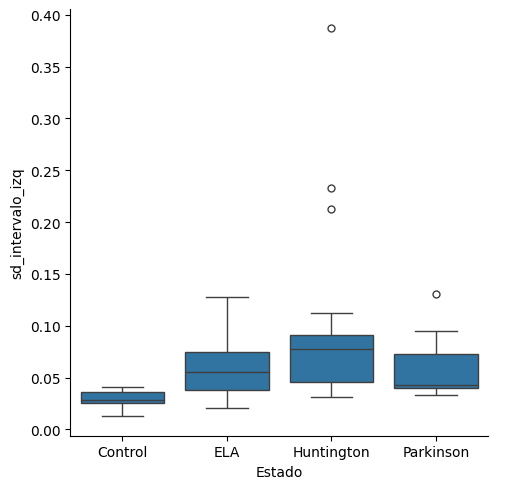

<Figure size 640x480 with 0 Axes>

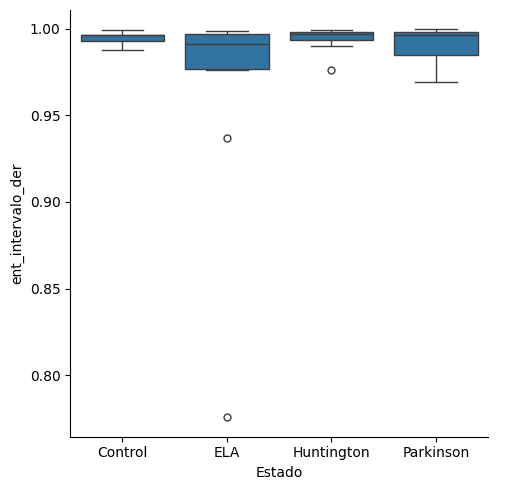

<Figure size 640x480 with 0 Axes>

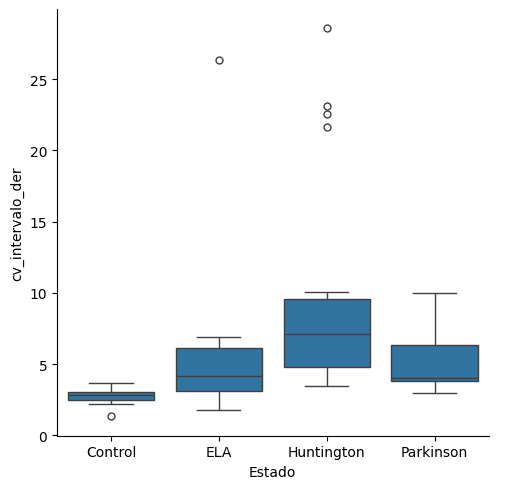

<Figure size 640x480 with 0 Axes>

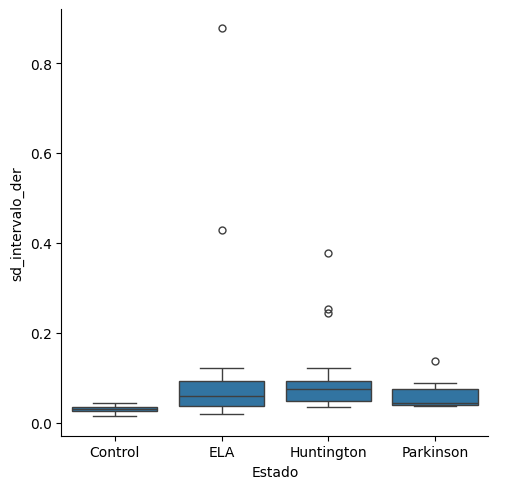

<Figure size 640x480 with 0 Axes>

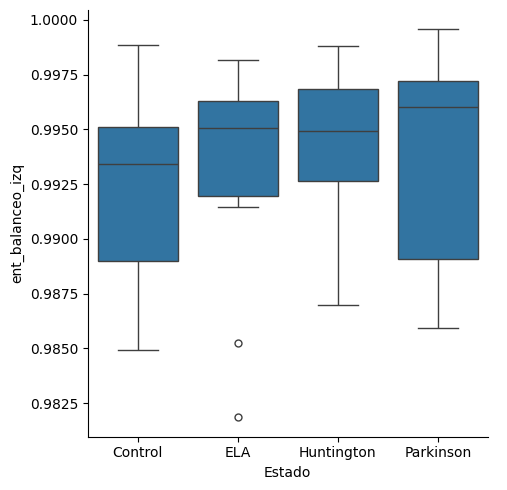

<Figure size 640x480 with 0 Axes>

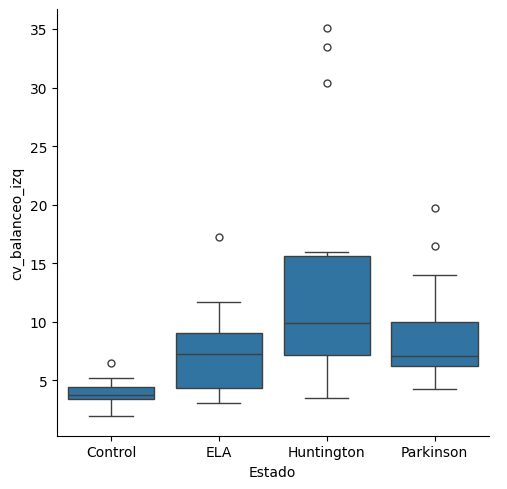

<Figure size 640x480 with 0 Axes>

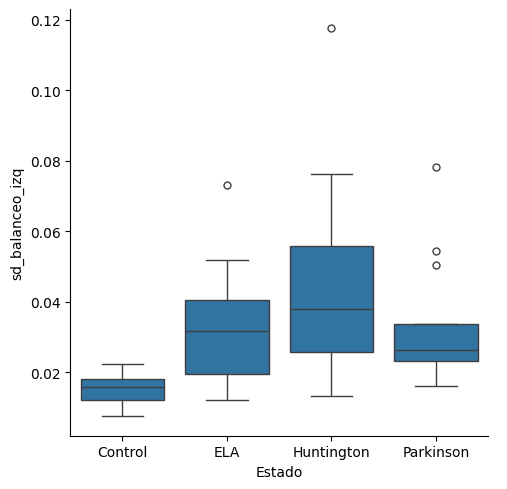

<Figure size 640x480 with 0 Axes>

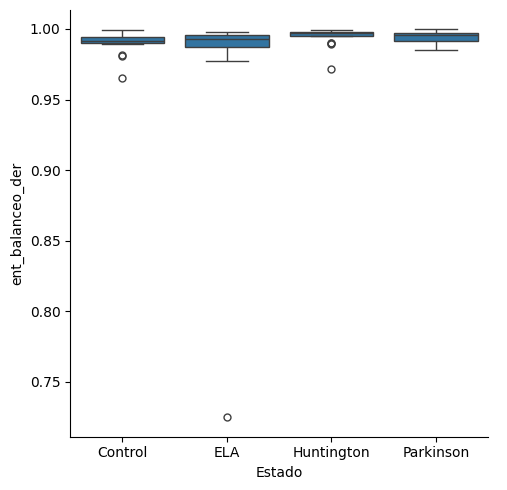

<Figure size 640x480 with 0 Axes>

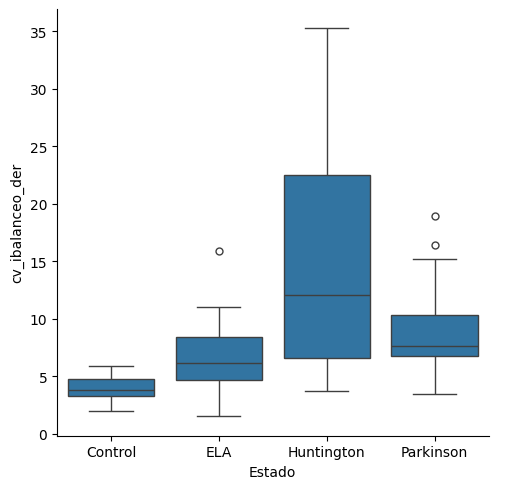

<Figure size 640x480 with 0 Axes>

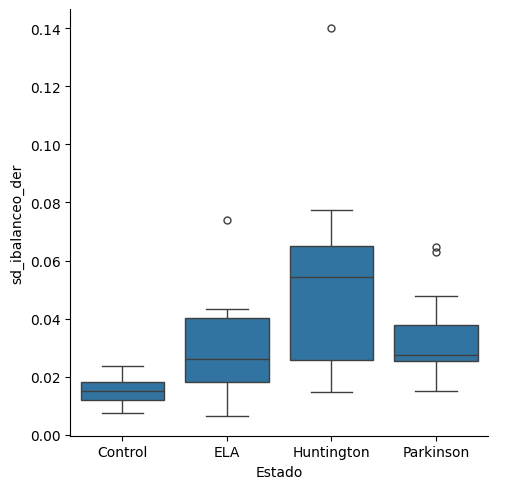

In [17]:
for i,j in enumerate(dfFinal.columns):
    if i <= 1:
        continue
    data = dfFinal[["Estado", j]]
    data[j] = data[j].apply(float)
    zscores = zscore(data[j])
    absScores = np.abs(zscores)
    data = data[absScores <= 3] # Esto elimina los datos atipicos
     
    plt.figure()
    sns.catplot(
    data=data, 
    kind="box", 
    x="Estado", 
    y=j
    )
    plt.show()
    

Analizando descriptivamente los gráficos obtenidos tenemos en general que para la entropia los pacientes con enfermedades neurodegenerativas presentaban menor variabilidad en los tiempos que los grupo control pero cada una presentaba diferencias en el grado de irregularidad.

El coeficiente de variación permite observar la magnitud de la variabilidad en la marcha. Los pacientes con Huntington presentan la mayor dispersión que se repite en la mayoria de gráficos de cv en cada una de los tiempos tanto de balaneo como entre los pasos, seguida de los pacientes con Parkinson y ELA, lo que indica diferentes niveles de inestabilidad y alteración en los patrones de marcha. Los controles sanos, tienen la menor variabilidad, lo que refleja una marcha regular y predecible.

La desviación estándar proporciona una idea clara de la regularidad o inestabilidad en los intervalos de la marcha entre grupos. Los pacientes con Huntington tienen la mayor variabilidad (mayor SD), seguidos por los de Parkinson y ELA (que presentan desviaciones similares en la mayoria de los casos), mientras que el grupo control presenta la menor dispersión. Sin embargo, esta diferencia es mas notoria en el balanceo del pie izquierdo y derecho. Esto refleja cómo cada enfermedad afecta de manera diferente la capacidad de mantener un patrón de marcha constante.

Algo importante a analizar es que sin importar cual de las medidas se haya utilizado, se presenta que visualmente la enfermedad de Huntington presenta distribuciones en valores mas altos, lo que significa que los pacientes con dichas enfermedades tienden a tener variaciones mas grandes en la marcha.

b. Planteamiento de las hipótesis nulas y alternativas (5%), selección del tipo de prueba (paramétrica o no paramétrica) (10%) y discusión de los resultados (10%) 

In [18]:
def pruebaT_U(data1: np.ndarray, data2: np.ndarray) -> bool:
    '''
    Prueba si un ndarray es cumple los requisitos para hacer una prueba T de student o 
    en caso contrario se requiere hacer una prueba U de Mann-Whitney
    
    Se retorna un True en caso de que se pueda hacer una prueba T y falso en caso contrario.
    '''
    _, pV_1 = stats.shapiro(data1)
    _, pV_2 = stats.shapiro(data2)
    if pV_1 < 0.05 or pV_2 < 0.05:
        return False
    
    _, pV_3 = stats.levene(data1, data2)

    if pV_3 < 0.05:
        return False

    return True

Inicialmente, se transforman los valores del dataframe a "Float", para posteriormente determinar que tipo de prueba se tiene que hacer haciendo uso de la funcion realizada donde se comprueba homocedasticidad y Normalidad, y dependiendo el resultado se decide hacer prueba T de student o de Mann Whitnney

In [30]:
Controles['cv_balanceo_izq']=pd.to_numeric(Controles['cv_balanceo_izq'], errors='coerce')
Hung['cv_balanceo_izq']=pd.to_numeric(Hung['cv_balanceo_izq'], errors='coerce')
ELA['cv_balanceo_izq']=pd.to_numeric(ELA['cv_balanceo_izq'], errors='coerce')
Park['cv_balanceo_izq']=pd.to_numeric(Park['cv_balanceo_izq'], errors='coerce')
Controles['sd_intervalo_izq']=pd.to_numeric(Controles['sd_intervalo_izq'], errors='coerce')
Hung['sd_intervalo_izq']=pd.to_numeric(Hung['sd_intervalo_izq'], errors='coerce')
ELA['sd_intervalo_izq']=pd.to_numeric(ELA['sd_intervalo_izq'], errors='coerce')
Park['sd_intervalo_izq']=pd.to_numeric(Park['sd_intervalo_izq'], errors='coerce')
Controles['ent_balanceo_izq']=pd.to_numeric(Controles['ent_balanceo_izq'], errors='coerce')
Hung['ent_balanceo_izq']=pd.to_numeric(Hung['ent_balanceo_izq'], errors='coerce')
ELA['ent_balanceo_izq']=pd.to_numeric(ELA['ent_balanceo_izq'], errors='coerce')
Park['ent_balanceo_izq']=pd.to_numeric(Park['ent_balanceo_izq'], errors='coerce')
Controles['cv_ibalanceo_der']=pd.to_numeric(Controles['cv_ibalanceo_der'], errors='coerce')
Hung['cv_ibalanceo_der']=pd.to_numeric(Hung['cv_ibalanceo_der'], errors='coerce')
ELA['cv_ibalanceo_der']=pd.to_numeric(ELA['cv_ibalanceo_der'], errors='coerce')
Park['cv_ibalanceo_der']=pd.to_numeric(Park['cv_ibalanceo_der'], errors='coerce')
Controles['ent_balanceo_der']=pd.to_numeric(Controles['ent_balanceo_der'], errors='coerce')
Hung['ent_balanceo_der']=pd.to_numeric(Hung['ent_balanceo_der'], errors='coerce')
ELA['ent_balanceo_der']=pd.to_numeric(ELA['ent_balanceo_der'], errors='coerce')
Park['ent_balanceo_der']=pd.to_numeric(Park['ent_balanceo_der'], errors='coerce')
Controles['sd_ibalanceo_der']=pd.to_numeric(Controles['sd_ibalanceo_der'], errors='coerce')
Hung['sd_ibalanceo_der']=pd.to_numeric(Hung['sd_ibalanceo_der'], errors='coerce')
ELA['sd_ibalanceo_der']=pd.to_numeric(ELA['sd_ibalanceo_der'], errors='coerce')
Park['sd_ibalanceo_der']=pd.to_numeric(Park['sd_ibalanceo_der'], errors='coerce')



In [20]:
print(pruebaT_U(Controles['cv_balanceo_izq'], Hung['cv_balanceo_izq']))
print(pruebaT_U(Controles['cv_balanceo_izq'], ELA['cv_balanceo_izq']))
print(pruebaT_U(Controles['cv_balanceo_izq'], Park['cv_balanceo_izq']))
print(pruebaT_U(Controles['sd_intervalo_izq'], Hung['sd_intervalo_izq']))
print(pruebaT_U(Controles['sd_intervalo_izq'], ELA['sd_intervalo_izq']))
print(pruebaT_U(Controles['sd_intervalo_izq'], Park['sd_intervalo_izq']))
print(pruebaT_U(Controles['ent_balanceo_izq'], Hung['ent_balanceo_izq']))
print(pruebaT_U(Controles['ent_balanceo_izq'], ELA['ent_balanceo_izq']))
print(pruebaT_U(Controles['cv_ibalanceo_der'], Park['cv_ibalanceo_der']))
print(pruebaT_U(Controles['cv_ibalanceo_der'], Hung['cv_ibalanceo_der']))
print(pruebaT_U(Controles['cv_ibalanceo_der'], ELA['cv_ibalanceo_der']))
print(pruebaT_U(Controles['sd_ibalanceo_der'], Park['sd_ibalanceo_der']))
print(pruebaT_U(Controles['sd_ibalanceo_der'], Hung['sd_ibalanceo_der']))
print(pruebaT_U(Controles['sd_ibalanceo_der'], ELA['sd_ibalanceo_der']))



False
False
False
False
False
False
False
False
False
False
False
False
False
False


#### **Pruebas de hipótesis**

Comparando los **coeficientes de variación del intervalo de tiempo del pie izquierdo**

Se realiza una prueba de **U de Mann-Whitney** para comparar entre los grupos de Control, Parkinson, Hungtinton y ELA, antes de realizar las pruebas también se hicieron las pruebas para realizar la **U de Mann-Whitney** o en caos contrario **T de student**, se utilizó la prueba de Shapiro para normalidad y prueba de Levene para evaluar la igualdad de varianzas.

Se decidió utilizar pruebas **U de Mann-Whitney** debido a que en todos los casos analizados se encontró que ninguno cumple las condiciones requeridas para hacer una prueba T de student, o sea, o al menos uno de los dos no tiene normalidad o tienen una diferencia significativa entre sus varianzas. Se presentan pruebas **U de Mann-Whitney** que indicarán si al comparar los estadisticos unos con los otros se puede encontrar que hay diferencias significativas entre los diferentes grupos analizados, teniendo que de esta manera se puede encontrar algún estadistico que pueda identificarse como importante para diferenciar los sanos de los enfermos, y las enfermedades entre si.

In [21]:
L = [Controles['cv_balanceo_izq'], Park['cv_balanceo_izq'], Hung['cv_balanceo_izq'], ELA['cv_balanceo_izq']]
MannWithney = {(i,k):stats.mannwhitneyu(j, l) for i,j in enumerate(L) for k,l in enumerate(L) if i != k}
LStr = ['Control', 'Parkinson', 'Huntington', 'ELA']
for i, j in MannWithney.items():
    if i[1] <= i[0]:
        continue
    else:
        _, p = j
        print(p)
        if p > 0.05:
            print(f'No hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (no se rechaza H0)')
        else:
            print(f'Hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (se rechaza H0)')

2.1442941922080876e-05
Hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo Control y la del grupo con Parkinson (se rechaza H0)
0.00010376345274353636
Hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo Control y la del grupo con Huntington (se rechaza H0)
0.004074120905044612
Hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo Control y la del grupo con ELA (se rechaza H0)
0.19931513588782468
No hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo Parkinson y la del grupo con Huntington (no se rechaza H0)
0.7822469515625688
No hay diferencias significativas entre el coeficiente de varianza del tiempo del pie izquierdo del grupo Parkinson y la del grupo con ELA (no se rechaza H0)
0.15527682926944852
No hay diferencias significativas entre el coeficiente de varianza del tiempo del pie iz

Los resultados indican que hay diferencias significativas en el coeficiente de variación del tiempo del pie izquierdo entre el grupo Control y los grupos con Parkinson, Huntington y ELA. Sin embargo, no se encontraron diferencias significativas entre los grupos de Parkinson, Huntington y ELA entre sí, lo que sugiere que, aunque los pacientes con enfermedades neurodegenerativas presentan variabilidad diferente respecto al grupo Control, las diferencias entre las enfermedades en sí no son tan marcadas. Lo cual indicaria que este tipo de metrica puede ser un potencial marcador para diferenciar a los pacientes sanos de cada una de estas enfermedades

Comparando la **desviación estandar del intervalo de tiempo de paso del pie izquierdo**

In [22]:
L = [Controles['sd_intervalo_izq'], Park['sd_intervalo_izq'], Hung['sd_intervalo_izq'], ELA['sd_intervalo_izq']]
MannWithney = {(i,k):stats.mannwhitneyu(j, l) for i,j in enumerate(L) for k,l in enumerate(L) if i != k}
LStr = ['Control', 'Parkinson', 'Huntington', 'ELA']
for i, j in MannWithney.items():
    if i[1] <= i[0]:
        continue
    else:
        _, p = j
        print(p)
        if p > 0.05:
            print(f'No hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (no se rechaza H0)')
        else:
            print(f'Hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (se rechaza H0)')

1.7960944172958168e-05
Hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo Control y la del grupo con Parkinson (se rechaza H0)
4.101184102425509e-06
Hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo Control y la del grupo con Huntington (se rechaza H0)
0.0006773174022402979
Hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo Control y la del grupo con ELA (se rechaza H0)
0.09272192830739198
No hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo Parkinson y la del grupo con Huntington (no se rechaza H0)
0.38144249774582006
No hay diferencias significativas entre la desviación estandar del intervalo de tiempo del pie izquierdo del grupo Parkinson y la del grupo con ELA (no se rechaza H0)
0.7639938761058094
No hay diferencias significativas entre la 

Al igual que en el caso anterior,  los resultados indican diferencias significativas en la desviación estándar del intervalo de tiempo del pie izquierdo entre el grupo Control y los grupos con Parkinson, Huntington y ELA. Sin embargo, no se encontraron diferencias significativas entre los grupos de Parkinson, Huntington y ELA entre sí. Esto sugiere que, aunque los pacientes con enfermedades neurodegenerativas muestran una variabilidad diferente en comparación con el grupo Control, las diferencias en la variabilidad entre las diferentes enfermedades no son tan marcadas.

Comparando la **entropia del balanceo de tiempo del pie izquierdo**

In [23]:
L = [Controles['ent_balanceo_izq'], Park['ent_balanceo_izq'], Hung['ent_balanceo_izq'], ELA['ent_balanceo_izq']]
MannWithney = {(i,k):stats.mannwhitneyu(j, l) for i,j in enumerate(L) for k,l in enumerate(L) if i != k}
LStr = ['Control', 'Parkinson', 'Huntington', 'ELA']
for i, j in MannWithney.items():
    if i[1] <= i[0]:
        continue
    else:
        _, p = j
        print(p)
        if p > 0.05:
            print(f'No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (no se rechaza H0)')
        else:
            print(f'Hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (se rechaza H0)')

0.1854353790670079
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Control y la del grupo con Parkinson (no se rechaza H0)
0.1622985013257089
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Control y la del grupo con Huntington (no se rechaza H0)
0.24519408567470347
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Control y la del grupo con ELA (no se rechaza H0)
0.8993022978950431
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Parkinson y la del grupo con Huntington (no se rechaza H0)
0.5189823900781524
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Parkinson y la del grupo con ELA (no se rechaza H0)
0.9521173592265316
No hay diferencias significativas entre la entropia del balanceo del pie izquierdo del grupo Huntington y la del grupo con ELA (no se rechaza H0)


Sin embargo, aunque visualmente los diagramas de caja evidenciaban diferencias entre los grupos en cuanto a la entropía del balanceo del pie izquierdo, los resultados de las pruebas de hipótesis mostraron que:

* Controles y ELA: No hay diferencias significativas entre la entropía del balanceo del pie izquierdo del grupo control y la del grupo con ELA (no se rechaza H0).

* Controles y Huntington: No hay diferencias significativas entre la entropía del balanceo del pie izquierdo del grupo control y la del grupo con Huntington (no se rechaza H0).

* Controles y Parkinson: No hay diferencias significativas entre la entropía del balanceo del pie izquierdo del grupo control y la del grupo con Parkinson (no se rechaza H0).

* Analisis entre grupos enfermos: De igual manera tampoco hay diferencias significativas entre la entropia del balanceo del pie izquierdo entre los diferentes grupos enfermos (no se rechaza H0 en ningun caso).


En conclusión, aunque los diagramas de caja sugieren la presencia de diferencias, las pruebas estadísticas no respaldan la existencia de diferencias significativas en la entropía del balanceo del pie izquierdo entre el grupo control y los grupos con ELA, Huntington y Parkinson.

Comparando el **coeficiente de variación del balanceo del pie derecho**

In [24]:
L = [Controles['cv_ibalanceo_der'], Park['cv_ibalanceo_der'], Hung['cv_ibalanceo_der'], ELA['cv_ibalanceo_der']]
MannWithney = {(i,k):stats.mannwhitneyu(j, l) for i,j in enumerate(L) for k,l in enumerate(L) if i != k}
LStr = ['Control', 'Parkinson', 'Huntington', 'ELA']
for i, j in MannWithney.items():
    if i[1] <= i[0]:
        continue
    else:
        _, p = j
        print(p)
        if p > 0.05:
            print(f'No hay diferencias significativas entre los coeficientes de variación del pie derecho del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (no se rechaza H0)')
        else:
            print(f'Hay diferencias significativas entre los coeficientes de variación del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (se rechaza H0)')

1.5021862996236419e-05
Hay diferencias significativas entre los coeficientes de variación del grupo Control y la del grupo con Parkinson (se rechaza H0)
9.264187025252e-06
Hay diferencias significativas entre los coeficientes de variación del grupo Control y la del grupo con Huntington (se rechaza H0)
0.01030584953182489
Hay diferencias significativas entre los coeficientes de variación del grupo Control y la del grupo con ELA (se rechaza H0)
0.2547511629904379
No hay diferencias significativas entre los coeficientes de variación del pie derecho del grupo Parkinson y la del grupo con Huntington (no se rechaza H0)
0.1971098174220124
No hay diferencias significativas entre los coeficientes de variación del pie derecho del grupo Parkinson y la del grupo con ELA (no se rechaza H0)
0.06853730355544271
No hay diferencias significativas entre los coeficientes de variación del pie derecho del grupo Huntington y la del grupo con ELA (no se rechaza H0)


Se evidencia que  hay diferencias significativas en la desviación del balanceo del pie derecho entre el grupo Control y los grupos con Parkinson, Huntington y ELA. Sin embargo, no se encontraron diferencias significativas entre los grupos de Parkinson, Huntington y ELA entre sí. Esto sugiere que, aunque los pacientes con enfermedades neurodegenerativas tienen patrones de balanceo alterados en comparación con el grupo Control, las diferencias en los patrones de balanceo entre las enfermedades no son tan marcadas.

Comparando la **desviación del balanceo del pie derecho**

In [25]:
L = [Controles['sd_ibalanceo_der'], Park['sd_ibalanceo_der'], Hung['sd_ibalanceo_der'], ELA['sd_ibalanceo_der']]
MannWithney = {(i,k):stats.mannwhitneyu(j, l) for i,j in enumerate(L) for k,l in enumerate(L) if i != k}
LStr = ['Control', 'Parkinson', 'Huntington', 'ELA']
for i, j in MannWithney.items():
    if i[1] <= i[0]:
        continue
    else:
        _, p = j
        print(p)
        if p > 0.05:
            print(f'No hay diferencias significativas entre la desviación estandar del pie derecho del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (no se rechaza H0)')
        else:
            print(f'Hay diferencias significativas entre la desviacion estandar del pie derecho del grupo {LStr[i[0]]} y la del grupo con {LStr[i[1]]} (se rechaza H0)')

1.7960944172958168e-05
Hay diferencias significativas entre la desviacion estandar del pie derecho del grupo Control y la del grupo con Parkinson (se rechaza H0)
2.0337327272767628e-05
Hay diferencias significativas entre la desviacion estandar del pie derecho del grupo Control y la del grupo con Huntington (se rechaza H0)
0.005358400752356842
Hay diferencias significativas entre la desviacion estandar del pie derecho del grupo Control y la del grupo con ELA (se rechaza H0)
0.09272192830739198
No hay diferencias significativas entre la desviación estandar del pie derecho del grupo Parkinson y la del grupo con Huntington (no se rechaza H0)
0.7471061995484956
No hay diferencias significativas entre la desviación estandar del pie derecho del grupo Parkinson y la del grupo con ELA (no se rechaza H0)
0.10495383866514424
No hay diferencias significativas entre la desviación estandar del pie derecho del grupo Huntington y la del grupo con ELA (no se rechaza H0)


Los resultados indican diferencias significativas en la desviación estándar del pie derecho entre el grupo Control y los grupos con Parkinson, Huntington y ELA (aunque el valor p indica que se debe tener precaución). Sin embargo, no se encontraron diferencias significativas entre los grupos de Parkinson, Huntington y ELA entre sí. Esto sugiere que, aunque los pacientes con enfermedades neurodegenerativas presentan variabilidad diferente en comparación con el grupo Control, las diferencias en la variabilidad entre las diferentes enfermedades no son tan marcadas.

Se evidencia que las métricas son funcionales para marcar diferencias entre los controles y los grupos con enfermedades neurodegenerativas, pero no establece diferencias entre ellas.

#### c. Discutir los resultados obtenidos con los presentado en el artículo base (10%)

En el estudio, se realizaron mediciones y comparaciones con la esclerosis lateral amiotrófica (ELA) tomando como referencia las mediciones del pie derecho, obteniendo los siguientes resultados:

Variabilidad del ritmo de la marcha: Los pacientes con ELA mostraron una mayor variabilidad en el ritmo de la marcha en comparación con el grupo control. Esto se reflejó en una mayor dispersión en las medidas de tiempo de paso y de tiempo de apoyo, lo que sugiere inestabilidad en el patrón de marcha de los pacientes con ELA.

Asimetría: Se observó una asimetría significativa en el patrón de marcha de los pacientes con ELA, que no estaba presente en el grupo control. Esta asimetría se manifestó como diferencias en la duración de los pasos entre las extremidades derecha e izquierda, lo que podría deberse a la debilidad muscular unilateral o progresiva.

Cambios en la fase de apoyo: Los pacientes con ELA también mostraron alteraciones en la fase de apoyo de la marcha, con un tiempo de apoyo más prolongado en comparación con el grupo control. Este hallazgo sugiere una compensación por la debilidad muscular, donde los pacientes intentan mantener la estabilidad prolongando el tiempo que el pie está en contacto con el suelo.

Frecuencia de pasos: La frecuencia de pasos fue significativamente menor en los pacientes con ELA, lo que indica una reducción en la velocidad de la marcha. Esta disminución en la velocidad puede estar relacionada con la falta de coordinación y debilidad muscular, que impiden mantener un ritmo de marcha normal.

Al comparar los coeficientes de variación y la desviación estanadar del grupo control con los de otras enfermedades neurológicas en el tiempo de balanceo del pie derecho, se encontraron diferencias significativas, como se muestra en la Tabla 1 del estudio. En particular, se observó un tiempo de balanceo mayor en la enfermedad de Huntington y un tiempo menor en el grupo control, lo que revela diferencias claras en la dinámica de la marcha entre las enfermedades. Estos resultados también son coherentes con las pruebas de hipótesis realizadas en el estudio, donde la desviación estándar  indico variaciones consistentes en los patrones de marcha observados en las enfermedades con los grupos control. Esto confirma que las alteraciones en el ritmo y la regularidad de la marcha son características distintivas de la ELA y otras enfermedades neurológicas.

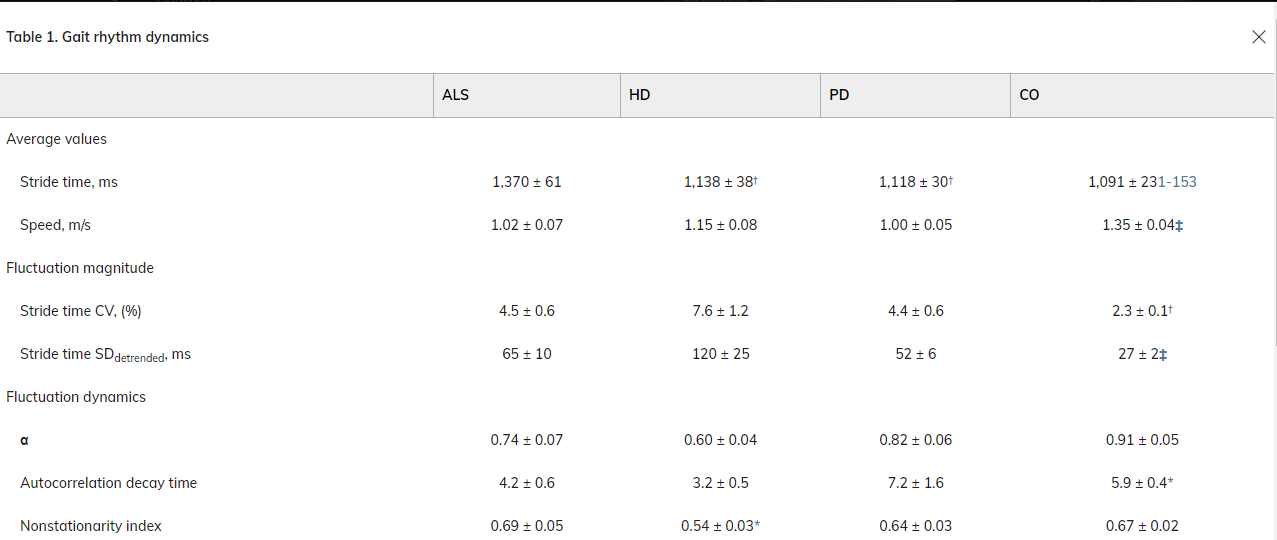

d. Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles (10%)

De acuerdo a los resultados obtenidos en las pruebas de hipótesis, aunque no mostraron resultados significativos para discriminar entre cada una de las enfermedades, las metricas que pueden ser funcionales para discriminar las poblaciones clínicas de los controles son: 

* *Coeficiente de variación del tiempo entre paso del pie izquierdo*

* *Desviación estándar del intervalo de tiempo entre paso del pie izquierdo* 

* *Desviación estándar del intervalo de tiempo entre paso pie derecho*

* *Desviación del tiempo de balanceo del pie derecho*

* *Coeficiente de variación del tiempo de balanceo del pie derecho*

Es importante notar que igualmente estos estadisticos presentan diferencias significativas únicamente los de control respecto a las enfermedades, pero las enfermedades entre si no representan ninguna diferencia significativa.

## **Bibliografía**

[1] La enfermedad de Parkinson: causas, síntomas y tratamientos. (s. f.). National Institute On Aging. https://www.nia.nih.gov/espanol/parkinson/enfermedad-parkinson-causas-sintomas-tratamientos

[2]Enfermedad de Huntington - Síntomas y causas - Mayo Clinic. (2024, 20 agosto). https://www.mayoclinic.org/es/diseases-conditions/huntingtons-disease/symptoms-causes/syc-20356117

[3] Rubin, M. (2024, 6 marzo). Esclerosis lateral amiotrófica (ELA) y otras enfermedades de la neurona motora (ENM). Manual MSD Versión Para Profesionales. https://edgeservices.bing.com/edgesvc/redirect?url=https%3A%2F%2Fwww.msdmanuals.com%2Fes%2Fprofessional%2Ftrastornos-neurol%25C3%25B3gicos%2Fsistema-nervioso-perif%25C3%25A9rico-y-trastornos-de-la-unidad-motora%2Fesclerosis-lateral-amiotr%25C3%25B3fica-ela-y-otras-enfermedades-de-la-neurona-motora-enm&hash=zaMyeR6PsxpJGG6tWb09%2FkTmQWT%2FQRVwad4daxr5FgI%3D&key=psc-underside&usparams=cvid%3A51D%7CBingProd%7C540C3738B351584411D10F2DD6CBC3A9EAE5F65E9CB835B20E0314DB06EA6454%5Ertone%3ABalanced

[4] Filho, M. (2023, 10 marzo). Detrending time series data with Python. Forecastegy. https://forecastegy.com/posts/detrending-time-series-data-python/

[5] Pearson, R. K., Neuvo, Y., Astola, J., & Gabbouj, M. (2016). Generalized Hampel filters. EURASIP Journal On Advances In Signal Processing, 2016(1). https://doi.org/10.1186/s13634-016-0383-6